In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [347]:
db = pd.read_excel('Detections_of_IBC_2018_07_06.xlsx', sheet_name='Detections_of_IBC')

In [348]:
db.head(3)

,Route,BorderLocation,NationalityLong,2009-01-01 00:00:00,2009-02-01 00:00:00,2009-03-01 00:00:00,2009-04-01 00:00:00,2009-05-01 00:00:00,2009-06-01 00:00:00,2009-07-01 00:00:00,...,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00
0,Black Sea,Sea,Iraq,0,0,0,0,0,0,0,...,134,301,0,60,0,0,0,0,0,0
1,Black Sea,Sea,Pakistan,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
2,Black Sea,Sea,Syria,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [349]:
db.Route.unique()

array(['Black Sea', 'Central Mediterranean',
       'Circular Route from Albania to Greece', 'Eastern Land Borders',
       'Eastern Mediterranean', 'Other', 'Western African',
       'Western Balkans', 'Western Mediterranean'], dtype=object)

In [350]:
db_centralMed = db[(db.Route == 'Central Mediterranean')]
db_centralMed.head()

,Route,BorderLocation,NationalityLong,2009-01-01 00:00:00,2009-02-01 00:00:00,2009-03-01 00:00:00,2009-04-01 00:00:00,2009-05-01 00:00:00,2009-06-01 00:00:00,2009-07-01 00:00:00,...,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00
11,Central Mediterranean,Sea,Eritrea,16,1,14,80,0,0,118,...,276,15,123,1098,216,1185,128,242,258,418
12,Central Mediterranean,Sea,Nigeria,200,36,580,645,176,0,7,...,305,478,362,587,109,212,114,75,294,357
13,Central Mediterranean,Sea,Tunisia,686,195,372,12,70,21,27,...,513,1286,3052,538,180,603,457,130,720,879
14,Central Mediterranean,Sea,Côte d'Ivoire,3,1,45,36,26,0,3,...,358,490,185,386,183,180,31,29,286,312
15,Central Mediterranean,Sea,Mali,5,2,39,34,61,0,21,...,427,508,279,306,72,107,31,60,219,256


In [351]:
centralMed_sum = db_centralMed.groupby(['Route']).sum()

In [352]:
# optional mask for excluding 2009 data (not very reliable)

# mask = pd.DatetimeIndex(db.columns[3:]) > pd.to_datetime('2010')
# mask = np.insert(mask,[0,0,0],[True,True,True])
# mask

#db_centralMed = db_centralMed.loc[:,mask].groupby(db_centralMed.Route).sum()

In [353]:
centralMed_sum

,2009-01-01 00:00:00,2009-02-01 00:00:00,2009-03-01 00:00:00,2009-04-01 00:00:00,2009-05-01 00:00:00,2009-06-01 00:00:00,2009-07-01 00:00:00,2009-08-01 00:00:00,2009-09-01 00:00:00,2009-10-01 00:00:00,...,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00
Route,,,,,,,,,,,,,,,,,,,,,
Central Mediterranean,1491,1221,2519,1981,610,107,504,562,583,942,...,3914,6266,5923,5583,2283,4150,1065,977,3083,3794


In [354]:
centralMed_sum = centralMed_sum.transpose()

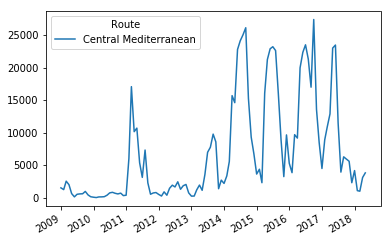

In [355]:
centralMed_sum.plot()

In [356]:
# taking the log to normalise the data

# centralMed_sum['Central Mediterranean'] = np.log(centralMed_sum['Central Mediterranean'])
# centralMed_sum.tail()

In [357]:
centralMed_new = centralMed_sum.reset_index()

In [358]:
centralMed_new = centralMed_new.rename(columns={'index':'ds', 'Central Mediterranean':'y'})

In [359]:
from fbprophet import Prophet
model = Prophet()

In [360]:
model.fit(centralMed_new)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/nunoalmeida/PycharmProjects/venv/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [371]:
future = model.make_future_dataframe(periods=12, freq='M')
future.tail()

,ds
120,2018-12-31
121,2019-01-31
122,2019-02-28
123,2019-03-31
124,2019-04-30


In [367]:
forecast = model.predict(future)

In [368]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
120,2018-12-31,14911.681278,14911.635793,14911.725655,3210.137988,18338.735183,-4410.545665,-4410.545665,-4410.545665,0.0,0.0,0.0,-4410.545665,-4410.545665,-4410.545665,10501.135613
121,2019-01-31,15038.961864,15038.905671,15039.015905,3370.406588,18486.595705,-3982.662596,-3982.662596,-3982.662596,0.0,0.0,0.0,-3982.662596,-3982.662596,-3982.662596,11056.299269
122,2019-02-28,15153.924975,15153.857728,15153.988147,5564.239924,20820.300759,-2087.469739,-2087.469739,-2087.469739,0.0,0.0,0.0,-2087.469739,-2087.469739,-2087.469739,13066.455236
123,2019-03-31,15281.205561,15281.127282,15281.279400,8121.307629,22440.206490,111.303993,111.303993,111.303993,0.0,0.0,0.0,111.303993,111.303993,111.303993,15392.509555
124,2019-04-30,15404.380323,15404.290478,15404.468447,10027.316639,25607.841043,2260.974948,2260.974948,2260.974948,0.0,0.0,0.0,2260.974948,2260.974948,2260.974948,17665.355271


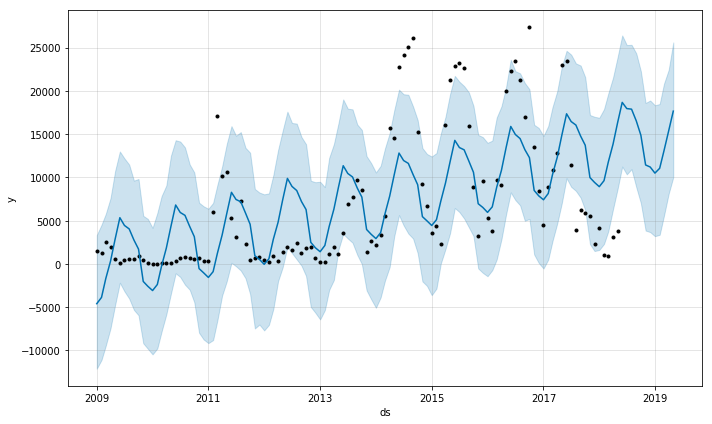

In [369]:
fig1 = model.plot(forecast)

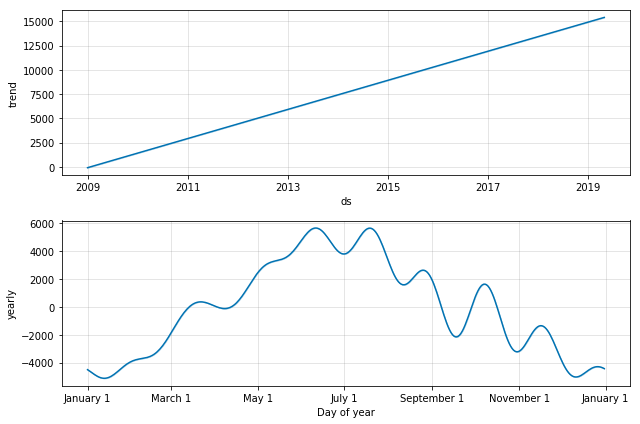

In [370]:
fig2 = model.plot_components(forecast)